In [1]:
import itertools

import joblib
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
corr_fn = "kendall"
data = joblib.load(f"correlations-{corr_fn}_teste.joblib")

In [3]:
techniques = list(data['approaches']['BS'].keys())
approaches = list(data['approaches'].keys())

### Approaches

In [ ]:
data_approaches = data['approaches']

In [ ]:
average_correlations = {}
for k, v in data_approaches.items():
    average_correlations[k] = {}
    for i, technique_1 in enumerate(techniques):
        average_correlations[k][technique_1] = {}
        for technique_2 in techniques:
            #if technique_1 == technique_2:
            #    average_correlations[k][technique_1][technique_2] = 1.0
            #    continue
            average_correlations[k][technique_1][technique_2] = np.mean(data_approaches[k][technique_1][technique_2])

In [ ]:
sns.set_context("paper", rc={"font.size": 16, "axes.titlesize": 14, "axes.labelsize": 14, "xtick.labelsize": 14, "ytick.labelsize": 14})

title_map = {
    'BS': 'Baseline',
    'ER-A': 'ER + Att',
    'ER-R': 'ER + AttR',
    'ER-C-A': 'ER-C + Att',
    'ER-C-R': 'ER-C + AttR'
}

techniques_map = {
    'attentions': 'Att',
    'rollout': 'AttR',
    'IxG': 'IxG',
    'alti_aggregated': 'ALTI',
    'decompx': 'DX',
    'decompx_classifier': 'DX-C',
}

fig, axs = plt.subplots(1, len(approaches), figsize=(16, 8), sharey=False)
for i, (k, v) in enumerate(average_correlations.items()):
    df = pd.DataFrame(v)
    df = df.T
    mask = np.tril(np.ones_like(df, dtype=bool), k=-1)
    hm = sns.heatmap(
        df,
        mask=mask,
        annot=True,
        cmap='Blues',
        square=True,
        ax=axs[i],
        vmin=-0.37,
        vmax=1.0,
        cbar=False,
        fmt=".2f",
        linewidth=0.01,
        annot_kws={"size": 12}
    )
    axs[i].set_title(title_map[k])

    hm.set_xticklabels([techniques_map[label.get_text()] for label in hm.get_xticklabels()])
    if i == 0:
        hm.set_yticklabels([techniques_map[label.get_text()] for label in hm.get_yticklabels()])
    else:
        hm.set_yticklabels([])

fig.tight_layout()
#fig.savefig(f"figures/sa_attributions_correlations_{corr_fn}.pdf", dpi=500, bbox_inches='tight')

### Techniques

In [4]:
data_techniques = data['techniques']

In [5]:
average_correlations = {}
for k, v in data_techniques.items():
    average_correlations[k] = {}
    for i, approach_1 in enumerate(approaches):
        average_correlations[k][approach_1] = {}
        for approach_2 in approaches:
            average_correlations[k][approach_1][approach_2] = np.mean(data_techniques[k][approach_1][approach_2])

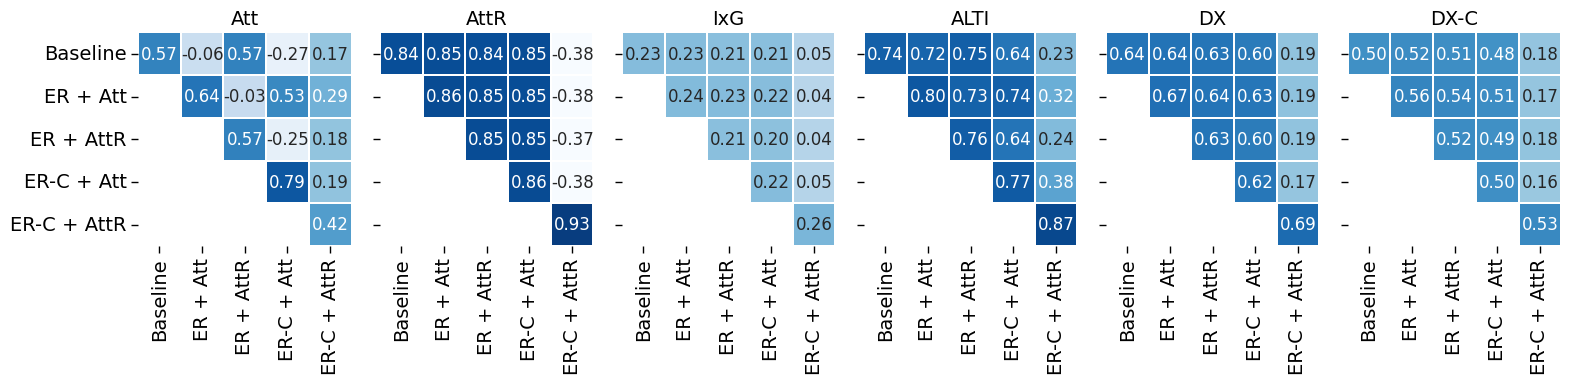

In [6]:
sns.set_context("paper", rc={"font.size": 16, "axes.titlesize": 14, "axes.labelsize": 14, "xtick.labelsize": 14, "ytick.labelsize": 14})

approaches_map = {
    'BS': 'Baseline',
    'ER-A': 'ER + Att',
    'ER-R': 'ER + AttR',
    'ER-C-A': 'ER-C + Att',
    'ER-C-R': 'ER-C + AttR'
}

techniques_map = {
    'attentions': 'Att',
    'rollout': 'AttR',
    'IxG': 'IxG',
    'alti_aggregated': 'ALTI',
    'decompx': 'DX',
    'decompx_classifier': 'DX-C',
}

fig, axs = plt.subplots(1, len(techniques), figsize=(16, 8), sharey=False)
for i, (k, v) in enumerate(average_correlations.items()):
    df = pd.DataFrame(v)
    df = df.T
    mask = np.tril(np.ones_like(df, dtype=bool), k=-1)
    hm = sns.heatmap(
        df,
        mask=mask,
        annot=True,
        cmap='Blues',
        square=True,
        ax=axs[i],
        vmin=-0.37,
        vmax=1.0,
        cbar=False,
        linewidths=0.01,
        fmt=".2f",
        annot_kws={"size": 12}
    )
    axs[i].set_title(techniques_map[k])

    hm.set_xticklabels([approaches_map[label.get_text()] for label in hm.get_xticklabels()])
    if i == 0:
        hm.set_yticklabels([approaches_map[label.get_text()] for label in hm.get_yticklabels()])
    else:
        hm.set_yticklabels([])

fig.tight_layout()
#fig.savefig(f"figures/sa_attributions_correlations_{corr_fn}.pdf", dpi=500, bbox_inches='tight')

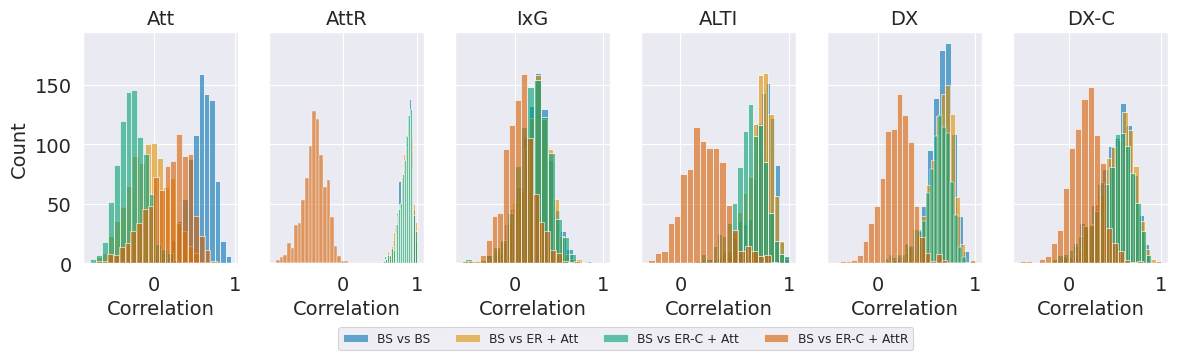

In [7]:
sns.set_style('darkgrid')
colors = sns.color_palette("colorblind")[:4]

fig, axs = plt.subplots(1, len(techniques), figsize=(14, 3), sharey=True)
for i, technique in enumerate(techniques):
    kwargs = {'ax': axs[i], 'alpha': 0.6, 'bins': 20}
    sns.histplot(data_techniques[technique]['BS']['BS'], color=colors[0], label='BS vs BS', **kwargs)
    sns.histplot(data_techniques[technique]['BS']['ER-A'], color=colors[1], label='BS vs ER + Att', **kwargs)
    sns.histplot(data_techniques[technique]['BS']['ER-C-A'], color=colors[2], label='BS vs ER-C + Att', **kwargs)
    sns.histplot(data_techniques[technique]['BS']['ER-C-R'], color=colors[3], label='BS vs ER-C + AttR', **kwargs)

    axs[i].set_title(techniques_map[technique])
    axs[i].set_xlabel("Correlation")

plt.legend(loc='upper center', bbox_to_anchor=(-2.5, -0.25), ncol=4)

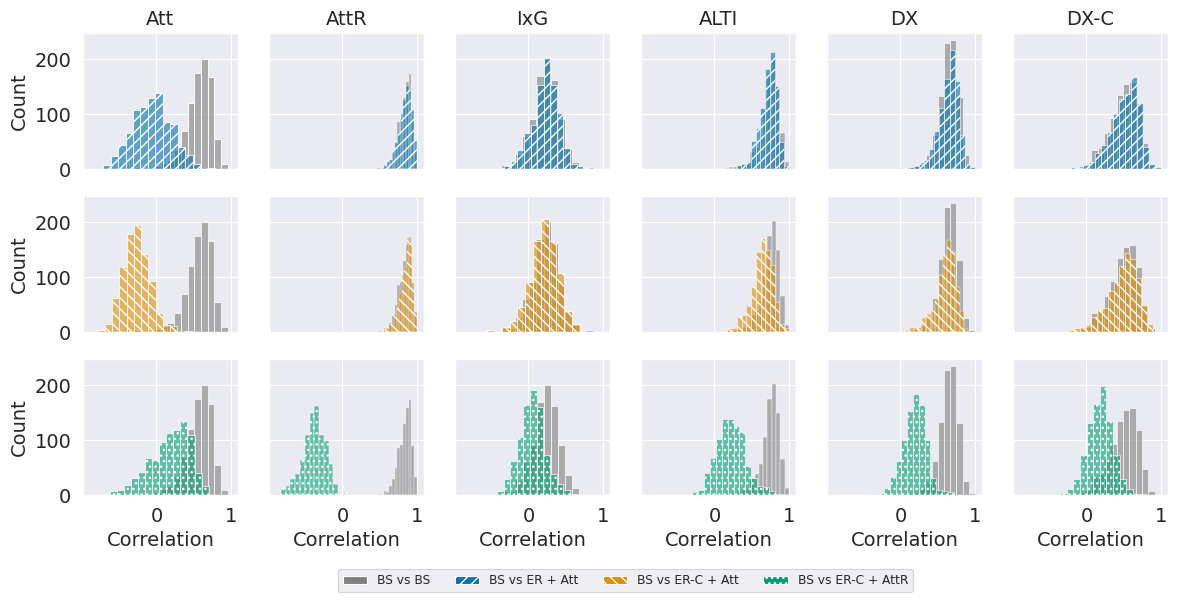

In [12]:
sns.set_style('darkgrid')
colors = sns.color_palette("colorblind")[:3]

hatches = {'ER-A': '///', 'ER-C-A': '\\\\\\', 'ER-C-R': '...'}

fig, axs = plt.subplots(3, len(techniques), figsize=(14, 6), sharey=True, sharex=True)
for i, approach in enumerate(['ER-A', 'ER-C-A', 'ER-C-R']):
    for j, technique in enumerate(techniques):
        kwargs = {'ax': axs[i,j], 'alpha': 0.6, 'bins': 15}
        sns.histplot(data_techniques[technique]['BS']['BS'], color='gray', **kwargs)
        sns.histplot(data_techniques[technique]['BS'][approach], color=colors[i], **kwargs)

        # Access the patches (bars) for the current axis
        patches = axs[i, j].patches
        
        # Apply the approach-specific hatch pattern for the second histogram
        for bar in patches[len(patches)//2:]:  # Second half corresponds to the second histogram
            bar.set_hatch(hatches[approach])  # Approach-specific pattern

        # Set title and labels
        axs[0, j].set_title(techniques_map[technique])
        axs[-1, j].set_xlabel("Correlation")


legend_entries = [
    mpatches.Patch(facecolor='gray', edgecolor='white', label='BS vs BS'),
    mpatches.Patch(facecolor=colors[0], edgecolor='white', hatch=hatches['ER-A'], label='BS vs ER + Att'),
    mpatches.Patch(facecolor=colors[1], edgecolor='white', hatch=hatches['ER-C-A'], label='BS vs ER-C + Att'),
    mpatches.Patch(facecolor=colors[2], edgecolor='white', hatch=hatches['ER-C-R'], label='BS vs ER-C + AttR')
]

plt.legend(handles=legend_entries, loc='upper center', bbox_to_anchor=(-2.5, -0.5), ncol=4)

fig.savefig(f"figures/sa_attributions_correlations_approaches_{corr_fn}.pdf", dpi=100, bbox_inches='tight')